## SETUP

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### 예제 1
- - -

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [12]:
print(X[:10])
print(y[:10])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
tree1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
io

<module 'io' from '/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/io.py'>

In [32]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [33]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

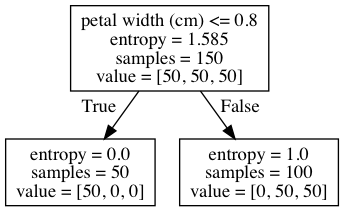

In [35]:
draw_decision_tree(tree1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

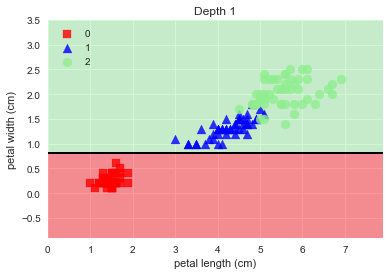

In [39]:
plot_decision_regions(X, y, tree1, "Depth 1")

In [40]:
confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [43]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
tree2

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

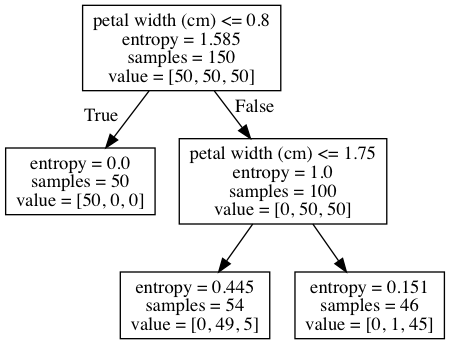

In [44]:
draw_decision_tree(tree2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

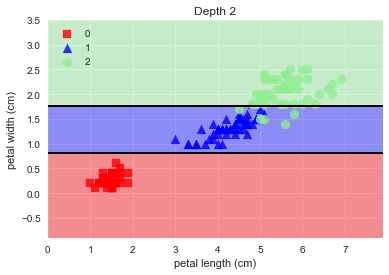

In [46]:
plot_decision_regions(X, y, tree2, "Depth 2")

In [47]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [48]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)
tree3

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

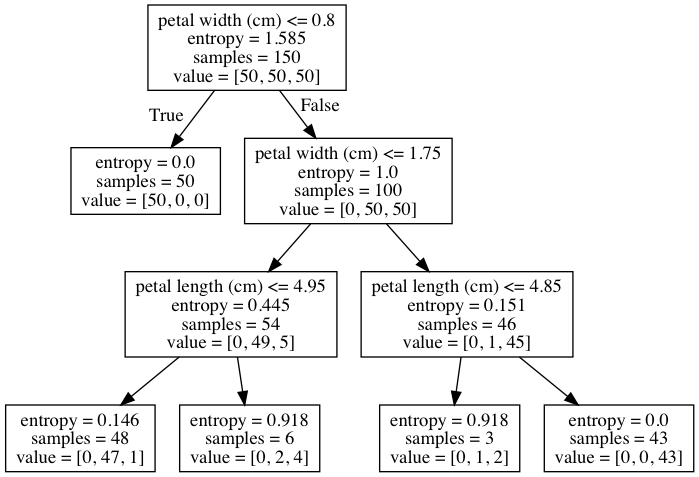

In [49]:
draw_decision_tree(tree3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

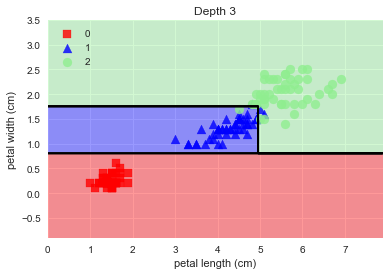

In [50]:
plot_decision_regions(X, y, tree3, "Depth 3")

In [51]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

### 연습 문제 1
- - -

- 붓꽃 분류 문제에서 꽃받침의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 정확도(accuracy) 기준으로 성능을 측정한다.
- K=5 인 교차 검증을 통해 테스트 성능 평균을 측정한다.
- max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

In [54]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
tree1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
confusion_matrix(y, tree1.predict(X))

array([[47,  0,  3],
       [11,  0, 39],
       [ 1,  0, 49]])

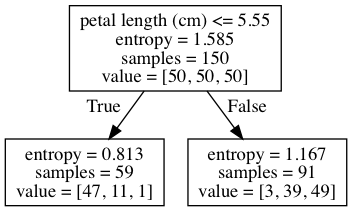

In [55]:
draw_decision_tree(tree1)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

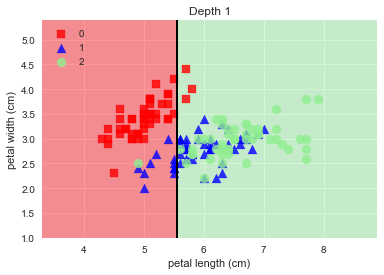

In [56]:
plot_decision_regions(X, y, tree1, "Depth 1")

In [57]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)
tree2

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

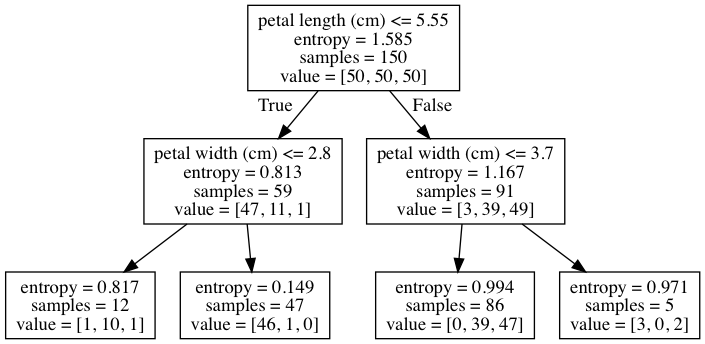

In [58]:
draw_decision_tree(tree2)

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

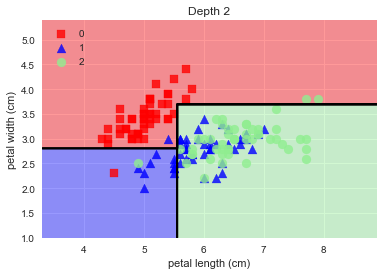

In [59]:
plot_decision_regions(X, y, tree2, "Depth 2")

In [60]:
confusion_matrix(y, tree2.predict(X))

array([[49,  1,  0],
       [ 1, 10, 39],
       [ 2,  1, 47]])

In [63]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)
tree5

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

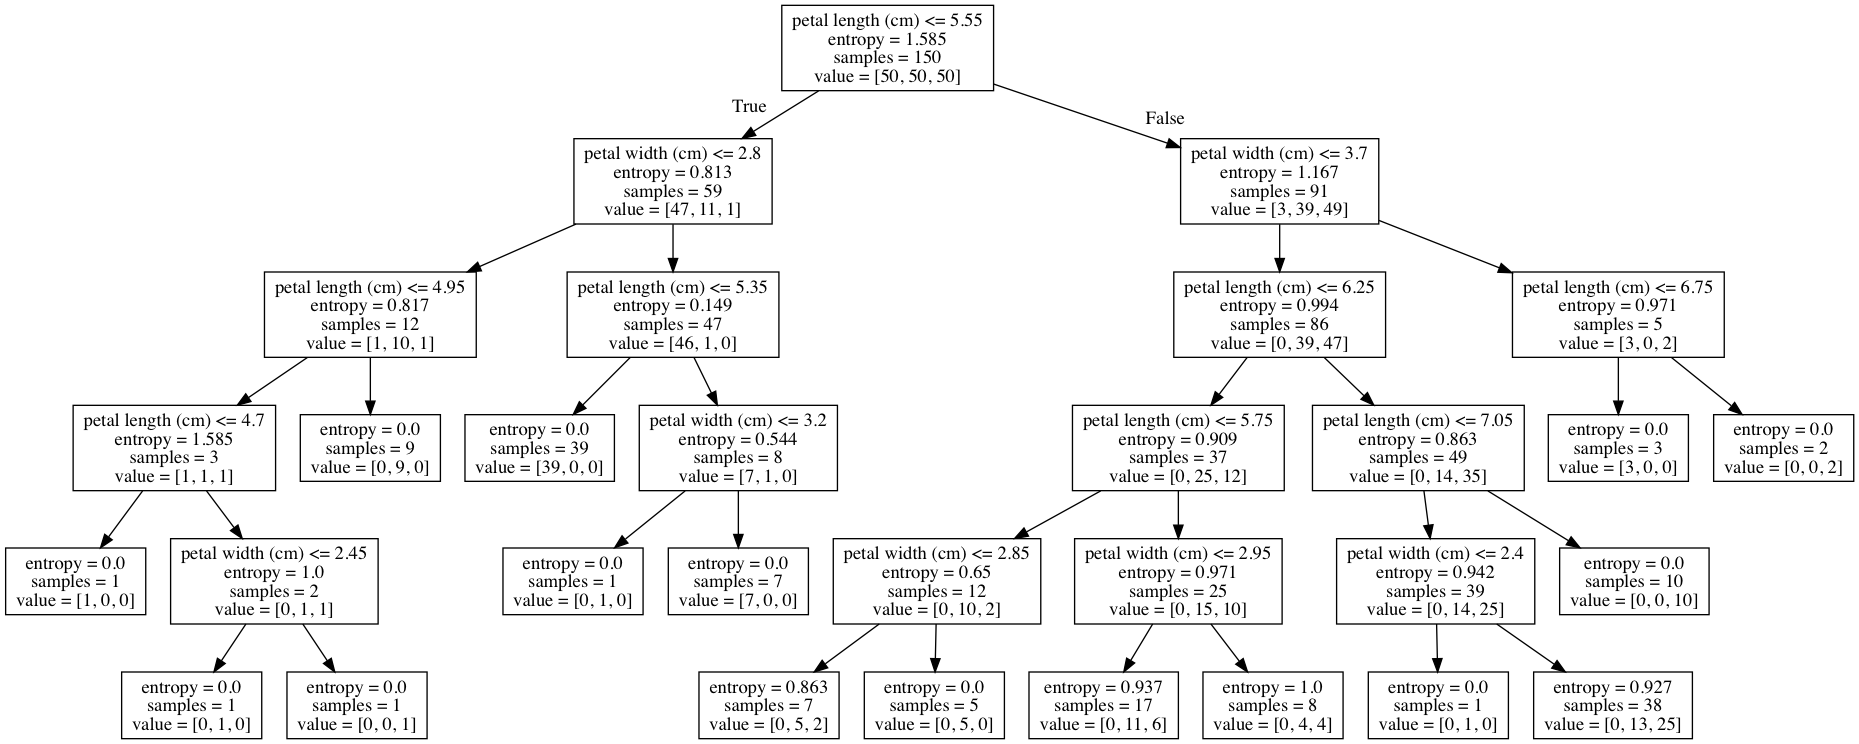

In [65]:
draw_decision_tree(tree5)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

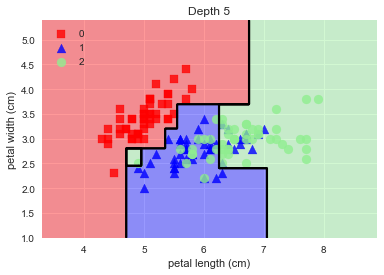

In [68]:
plot_decision_regions(X, y, tree5, "Depth 5")

In [66]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 12, 38]])

max_depth =  1  | accuracy :  0.6199999999999999
max_depth =  2  | accuracy :  0.6666666666666667
max_depth =  3  | accuracy :  0.6933333333333332
max_depth =  4  | accuracy :  0.7666666666666667
max_depth =  5  | accuracy :  0.76
max_depth =  6  | accuracy :  0.7133333333333333
max_depth =  7  | accuracy :  0.7
max_depth =  8  | accuracy :  0.7
max_depth =  9  | accuracy :  0.7133333333333332


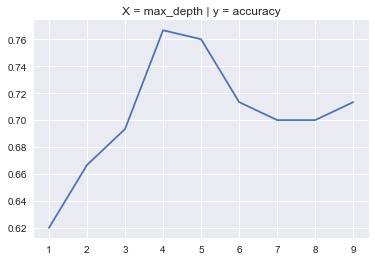

In [69]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
accuracy = []

for i in range(1, 10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0).fit(X, y)
    result = np.mean(cross_val_score(tree, X, y, scoring='accuracy', cv=5))
    accuracy.append(result)
    print("max_depth = ", i, " | accuracy : ", result)

plt.title("X = max_depth | y = accuracy")
plt.plot(range(1, 10), accuracy)
plt.show()
    # max_depth가 4일때, 평균 accuracy 성능이 가장 좋다.

### 예제2 : 타이타닉 생존자 예측

In [95]:
df = sns.load_dataset("titanic")
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [96]:
feature = ['pclass', 'age', 'sex']
dfX = df[feature].copy()
dfy = df['survived']
dfy.tail()

886    0
887    1
888    0
889    1
890    0
Name: survived, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()

In [99]:
dfX['sex'] = le.fit_transform(dfX['sex'])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [100]:
dfX['age'].mean()

29.69911764705882

In [101]:
dfX['age'].fillna(dfX['age'].mean(), inplace=True)

In [102]:
from sklearn.preprocessing import LabelBinarizer

In [103]:
lb = LabelBinarizer()

In [104]:
dfX2 = pd.DataFrame(lb.fit_transform(dfX['pclass']), columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del dfX['pclass']
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [105]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 5), (223, 5), (668,), (223,))

In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0).fit(X_train, y_train)

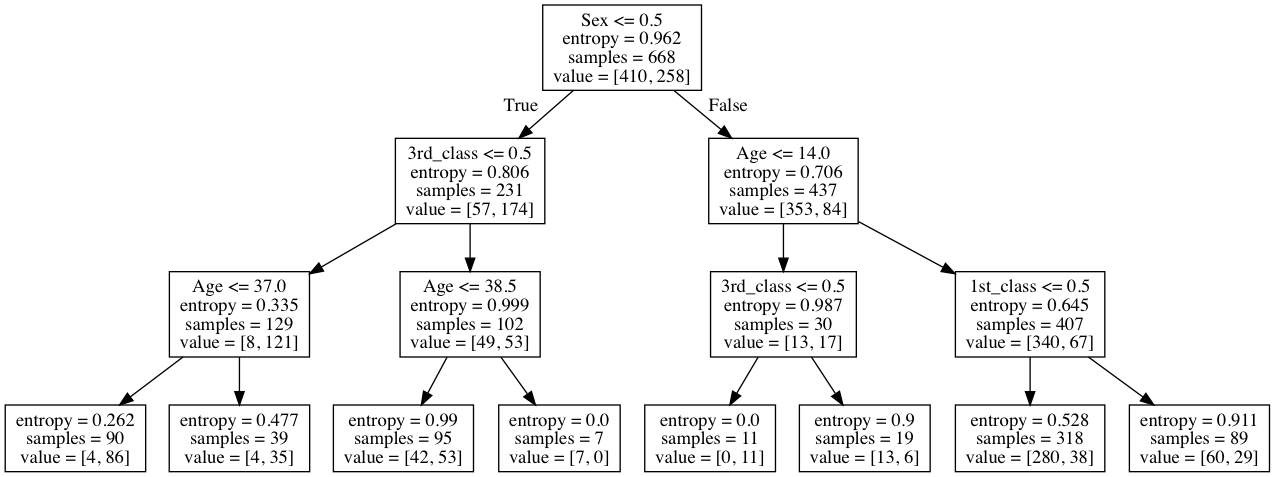

In [115]:
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=['Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [116]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]])

In [117]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]])

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       410
          1       0.79      0.72      0.75       258

avg / total       0.81      0.82      0.81       668



In [119]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       139
          1       0.75      0.70      0.72        84

avg / total       0.80      0.80      0.80       223



### 연습문제 2

1. breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

In [121]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [142]:
load_breast_cancer?

In [129]:
breast.data.shape, breast.target.shape

((569, 30), (569,))

In [145]:
dfX2 = pd.DataFrame(breast.data, columns=breast.feature_names)
dfy2 = pd.DataFrame(breast.target, columns=['tested'])
dfy2.tail()

,tested
564,0
565,0
566,0
567,0
568,1
